# Algoritmo Genético CHC

In [1]:
# import import_ipynb
# from algoritmos import *
from ipynb.fs.full.algoritmos import *

## Generación de semillas aleatorias

In [2]:
semilla = random.randint(0,9999999)

## Fichero ch130

geneticoCHC

Fichero: ch130
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
Tiempo de ejecución: 58.533535

-------- PARÁMETROS A. GENÉTICO ---------
Sembrar greedy:	 True
Tam población:	 75
Tam mutación diverge:	 32
------------------------------------------
Mejor sol Coste: 7434 	 #It: 29436 	 Semilla: 6481120
-----
Coste Media:	13618.866667
-----
Coste Mejor:	7434.000000


<Figure size 864x864 with 0 Axes>

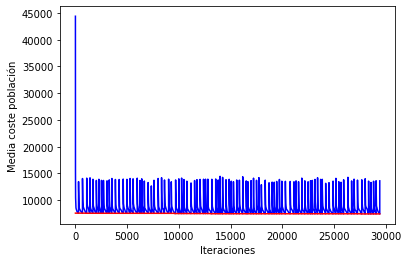

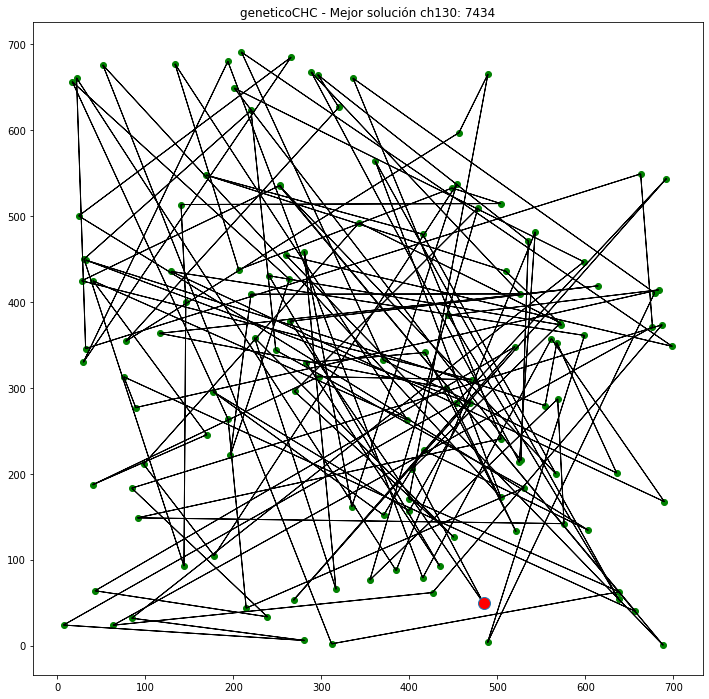

In [4]:
%matplotlib notebook
%matplotlib inline

plt.figure(figsize=(12,12)) 
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Iteraciones') ; ax.set_ylabel('Media coste población')

algoritmo = "geneticoCHC"
print(algoritmo)
fichero = "ch130"
nodos = leeFichero(fichero)
distancias = getMDistancias(nodos)
    
print(f"\nFichero: {fichero}")

costes = []
it = []
mejorSolucion = []
mejorCoste = float('inf')

# Parámetros del algoritmo
num_nodos = len(nodos)    # Fichero
tam_poblacion = 75 # 30-100 individuos
tam_mutacion_diverge = round(num_nodos * 0.25) # Variación aleatoria con respecto al individuo plantilla
sembrar_greedy = True # Plantar individuo solución algoritmo greedy
#########################

t = time.time()
# with Pool(processes=5) as p:
#         resultados = p.starmap(genetico_CHC, product([semilla], [num_nodos], [distancias], [tam_poblacion], [tam_mutacion_diverge], [sembrar_greedy], [fig], [ax]))[0]

resultados = genetico_CHC(semilla, num_nodos, distancias, tam_poblacion, tam_mutacion_diverge, sembrar_greedy, fig, ax)
    
elapsed = time.time() - t
print("Tiempo de ejecución: %f\n" % elapsed )

poblacion = resultados[0]
mejorIndividuo = min(poblacion.individuos)
mejorSolucion = mejorIndividuo.camino
coste = mejorIndividuo.coste

print("-------- PARÁMETROS A. GENÉTICO ---------")
print("Sembrar greedy:\t", sembrar_greedy)
print("Tam población:\t", tam_poblacion)
print("Tam mutación diverge:\t", tam_mutacion_diverge)
print("------------------------------------------")


print("Mejor sol Coste: %s \t #It: %i \t Semilla: %s" % (coste, resultados[1], semilla) ) 
print("-----\nCoste Media:\t%f" % poblacion.media)
print("-----\nCoste Mejor:\t%f" % coste)

xs = resultados[2]
ys = resultados[3]
ys2 = resultados[4]
plt_dynamic(fig, xs, ys, ax)
plt_dynamic(fig, xs, ys2, ax, ['r'])

titulo = algoritmo + " - Mejor solución " + fichero + ": " + str(coste)
pintaCamino(mejorSolucion, nodos, titulo)